# *Import all relevant libraries for video and image processing*

In [1]:
# Import relevant libraries for video and image processing
from IPython.display import HTML
from moviepy.editor import VideoFileClip
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
%matplotlib inline



## All functions to process image

In [4]:

# This function converts an image to grayscale
def convert_to_greyscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# This function applies a Canny transform to an image
def apply_canny_transform(image, low_threshold, high_threshold):
    return cv2.Canny(image, low_threshold, high_threshold)

# This function applies a Gaussian blur to an image
def apply_gaussian_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# This function applies a mask to an image
def apply_mask(image, vertices):
    #define a blank mask to start 
    mask = np.zeros_like(image)

    #define a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255

    cv2.fillPoly(mask, vertices, ignore_mask_color)

    #return the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

# This function detects lines using Hough Line Transformation
def hough_line_transformation(image, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# This function draws lines on an image
def draw_lines(image, lines, color=[255, 0, 0], thickness=7):
    x_bottom_pos = []
    x_upper_pos = []
    x_bottom_neg = []
    x_upper_neg = []

    y_bottom = 540
    y_upper = 315

    slope = 0
    b = 0

    for line in lines:
        for x1,y1,x2,y2 in line:
            if ((y2-y1)/(x2-x1)) > 0.5 and ((y2-y1)/(x2-x1)) < 0.8:
                slope = (y2-y1)/(x2-x1)
                b = y1 - slope*x1
                x_bottom_pos.append((y_bottom-b)/slope)
                x_upper_pos.append((y_upper-b)/slope)

            elif ((y2-y1)/(x2-x1)) < -0.5 and ((y2-y1)/(x2-x1)) > -0.8:
                slope = (y2-y1)/(x2-x1)
                b = y1 - slope*x1
                x_bottom_neg.append((y_bottom-b)/slope)
                x_upper_neg.append((y_upper-b)/slope)

        # Create a new 2d Array with means
        lines_mean = np.array([[int(np.mean(x_bottom_pos)), int(np.mean(y_bottom)), int(np.mean(x_upper_pos)), int(np.mean(y_upper))],
                                 [int(np.mean(x_bottom_neg)), int(np.mean(y_bottom)), int(np.mean(x_upper_neg)), int(np.mean(y_upper))]])
        
        # Draw lines
        for i in range(len(lines_mean)):
            cv2.line(image, (lines_mean[i][0], lines_mean[i][1]), (lines_mean[i][2], lines_mean[i][3]), color, thickness)

# This function merges the lines with the original image
def merge_lines_with_image(image, lines):
    return cv2.addWeighted(image, 0.8, lines, 1, 0)



## Test to see if image is able to be read

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


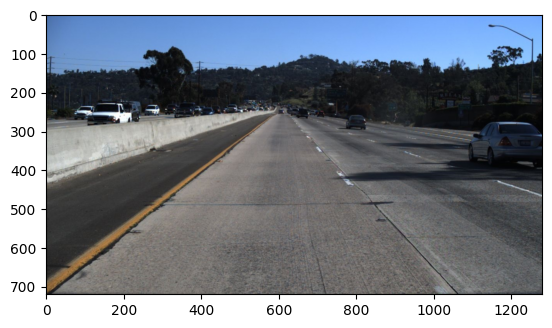

In [6]:
image = mpimg.imread('../Dataset/Input/15.jpg')
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

## Test if image is able to be converted into greyscale

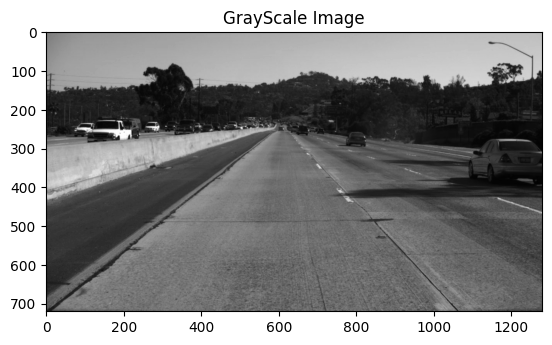

In [7]:
gray = convert_to_greyscale(image)
plt.title("GrayScale Image")
plt.imshow(gray, cmap='gray')

## Apply Gaussian Blur to Image

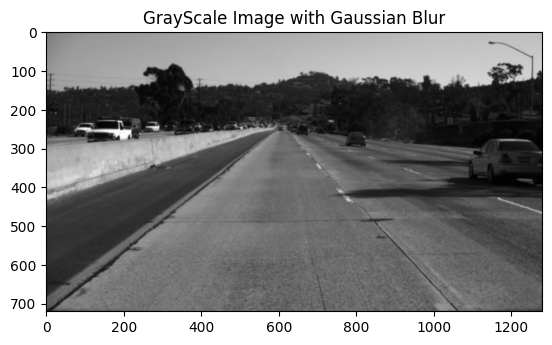

In [8]:
kernel_size = 5 # Kernel size
blur_gray = apply_gaussian_blur(gray, kernel_size)
plt.title("GrayScale Image with Gaussian Blur")
plt.imshow(blur_gray, cmap='gray')

## Apply Canny Transform

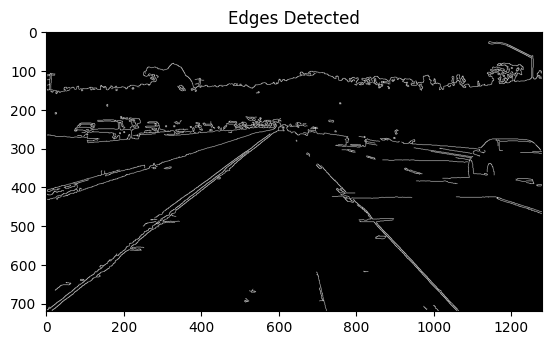

In [9]:
low_threshold = 50
high_threshold = 150

edges = apply_canny_transform(blur_gray, low_threshold, high_threshold)
plt.title("Edges Detected")
plt.imshow(edges, cmap='Greys_r')

## Apply Mask to Image

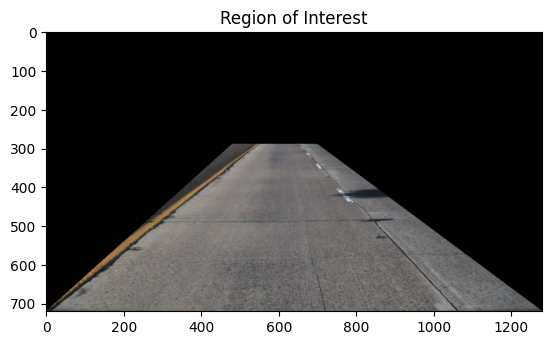

In [10]:
vertices = np.array([[(0,image.shape[0]),(480, 290), (700, 290), (image.shape[1],image.shape[0])]], dtype=np.int32)

mask = apply_mask(image, vertices)
plt.title("Region of Interest")
plt.imshow(mask, cmap='Greys_r')

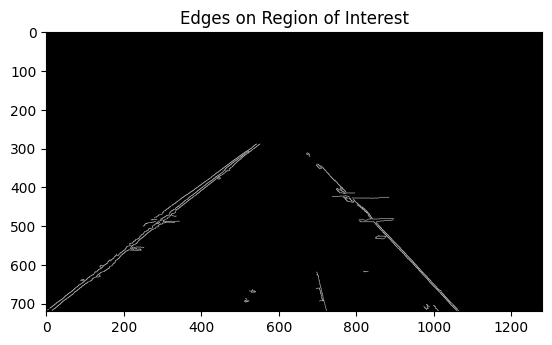

In [33]:
masked_edges = apply_mask(edges, vertices)
plt.title("Edges on Region of Interest")
plt.imshow(masked_edges, cmap='Greys_r')

## Use Hough Transform

In [35]:
rho = 3
theta = np.pi/180
threshold = 15
min_line_len = 150
max_line_gap = 50

lines = hough_line_transformation(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
plt.title("Lines Detected")
plt.imshow(lines)

  return _methods._mean(a, axis=axis, dtype=dtype,

  ret = ret.dtype.type(ret / rcount)



ValueError: ignored